In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


file_path = '/content/drive/My Drive/Dataset/Datastorm Semis/customer_dataset.csv'

df = pd.read_csv(file_path)

<ipython-input-7-f531fe546d2d>:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570000 entries, 0 to 569999
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      570000 non-null  int64  
 1   average_monthly_spend            560614 non-null  object 
 2   average_monthly_visit_frequency  560672 non-null  object 
 3   average_monthly_basket_size      560714 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.4+ MB


**Data Pre-processing**

In [ ]:
# Renaming columns to shorter names
df.rename(columns={
    'customer_id': 'id',
    'average_monthly_spend': 'spend',
    'average_monthly_visit_frequency': 'visits',
    'average_monthly_basket_size': 'basket'
}, inplace=True)

In [ ]:
# Identifying non-numeric values in 'spend' column
df['spend_numeric'] = pd.to_numeric(df['spend'], errors='coerce')

# Extracting non-numeric values
non_numeric_spend = df[df['spend_numeric'].isna()]['spend'].unique()
print(f"Unique non-numeric values in spend:")
print(non_numeric_spend)

# Counting non-numeric values
num_non_numeric_spend = len(df[df['spend_numeric'].isna()])
print(f"Number of non-numeric values in spend: {num_non_numeric_spend}")

Unique non-numeric values in spend:
['nine hundred' nan]
Number of non-numeric values in spend: 9387


In [ ]:
# Identifying non-numeric values in 'visits' column
df['visits_numeric'] = pd.to_numeric(df['visits'], errors='coerce')

# Extracting non-numeric values
non_numeric_visits = df[df['visits_numeric'].isna()]['visits'].unique()
print(f"Unique non-numeric values in visits:")
print(non_numeric_visits)

# Counting non-numeric values
num_non_numeric_visits = len(df[df['visits_numeric'].isna()])
print(f"Number of non-numeric values in visits: {num_non_numeric_visits}")

Unique non-numeric values in visits:
[nan 'one point two' 'nine point five' 'two' 'twenty two'
 'three point four']
Number of non-numeric values in visits: 9333


In [ ]:
# Identifying non-numeric values in 'basket' column
df['basket_numeric'] = pd.to_numeric(df['basket'], errors='coerce')

# Extracting non-numeric values
non_numeric_basket = df[df['basket_numeric'].isna()]['basket'].unique()
print(f"Unique non-numeric values in basket:")
print(non_numeric_basket)

# Counting non-numeric values
num_non_numeric_basket = len(df[df['basket_numeric'].isna()])
print(f"Number of non-numeric values in basket: {num_non_numeric_basket}")

Unique non-numeric values in basket:
[nan]
Number of non-numeric values in basket: 9286


In [ ]:
# Mapping dictionary for specific textual representations to numbers
text_to_number_mapping = {
    'nine hundred': 900,
    'one point two': 1.2,
    'nine point five': 9.5,
    'two': 2,
    'twenty two': 22,
    'three point four': 3.4
}

# Function to convert specific textual representations to numbers
def text_to_number(text):
    if pd.isna(text):
        return text
    if isinstance(text, str):
        text = text.lower()
        if text == 'nul':
            return float('nan')  # Convert 'nul' to NaN
        return text_to_number_mapping.get(text, text)
    else:
        return text

In [ ]:
df['spend'] = df['spend'].apply(text_to_number)
df['visits'] = df['visits'].apply(text_to_number)
df['basket'] = df['basket'].apply(text_to_number)

In [ ]:
# Dropping the temporary columns
df.drop(columns=['spend_numeric', 'visits_numeric', 'basket_numeric'], inplace=True)

In [ ]:
df.id = df.id.astype(int)
df.spend = df.spend.astype(float)
df.visits = df.visits.astype(float)
df.basket = df.basket.astype(float)



 **Checking for duplicates**

In [ ]:
df.duplicated().sum()

9997

In [ ]:
df=df.drop_duplicates()

In [ ]:
#id has duplicates
df[df.duplicated('id',keep=False)]

,id,spend,visits,basket
244800,244801,4225.0,2.94,1.92
322879,322880,-12334.0,2.97,4.80
514835,514836,11460.0,-1.00,3.10
568257,322880,14232.0,2.97,4.80
568681,514836,11460.0,1.97,3.10
569999,244801,4225.0,3.40,1.92


In [ ]:
df.drop(index=[569999,514835,322879],inplace=True)

In [ ]:
# Convert 'spend', 'visits', and 'basket' columns to numeric type
df['spend'] = pd.to_numeric(df['spend'], errors='coerce')
df['visits'] = pd.to_numeric(df['visits'], errors='coerce')
df['basket'] = pd.to_numeric(df['basket'], errors='coerce')

# Identify rows with negative values in 'spend', 'visits', and 'basket'
negative_spend = df[df['spend'] < 0]
negative_visits = df[df['visits'] < 0]
negative_basket = df[df['basket'] < 0]

# Print the rows with negative values
print("Negative values in 'spend':")
print(negative_spend)

print("\nNegative values in 'visits':")
print(negative_visits)

print("\nNegative values in 'basket':")
print(negative_basket)

Negative values in 'spend':
            id  spend  visits  basket
324157  324158   -1.0    2.65    2.79
516512  516513   -1.0    7.23    9.45

Negative values in 'visits':
            id    spend  visits  basket
139        140  86989.0    -3.0   35.50
238        239  48728.0   -20.0   10.52
314        315   1040.0    -1.0    1.69
628        629  43144.0    -1.0   10.61
756        757  24336.0   -10.0   10.10
323073  323074  48516.0    -4.5   10.59
516161  516162  94869.0   -12.0   17.52
516377  516378  49875.0   -20.0    9.25

Negative values in 'basket':
      id    spend  visits  basket
482  483  99100.0   19.24   -19.0


In [ ]:
# Drop specific rows by their index
df = df.drop(df[df['id'].isin([324158, 516513])].index)

# Change negative spend values to positive
df['spend'] = df['spend'].abs()
# Change negative visits values to positive
df['visits'] = df['visits'].abs()

# Change negative basket values to positive
df['basket'] = df['basket'].abs()

# Print the updated DataFrame
print(df)

            id     spend  visits  basket
0            1     790.0    1.11    2.84
1            2  176875.0   15.74   33.83
2            3    6812.0    2.11     NaN
3            4   38542.0    7.82   10.73
4            5   48712.0    7.51   10.04
...        ...       ...     ...     ...
559997  559998   20502.0    7.02    9.23
559998  559999    3876.0    1.14    2.84
559999  560000    1556.0    2.32    3.48
568257  322880   14232.0    2.97    4.80
568681  514836   11460.0    1.97    3.10

[559998 rows x 4 columns]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['spend', 'visits', 'basket']] = imputer.fit_transform(df[['spend', 'visits', 'basket']])

In [ ]:
# Check the sum of missing values in each column
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)

id        0
spend     0
visits    0
basket    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559998 entries, 0 to 568681
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      559998 non-null  int64  
 1   spend   559998 non-null  float64
 2   visits  559998 non-null  float64
 3   basket  559998 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 21.4 MB


# Descriptive Analysis

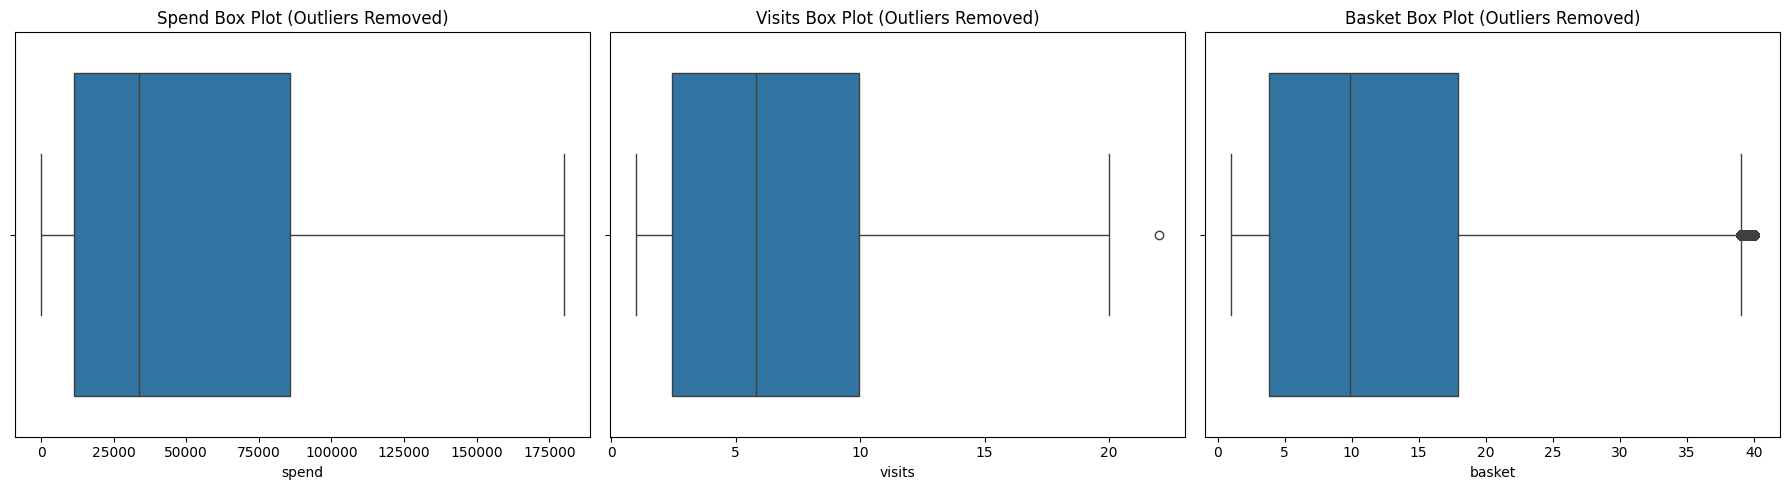

Number of outliers removed: 56000


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Create a dataframe to store the original data without outliers
df_cleaned = df.copy()

# Extract features for outlier detection
features = ['spend', 'visits', 'basket']

# Fit the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
outlier_labels = lof.fit_predict(df[features])

# Mark outliers in the original dataframe
outliers_mask = outlier_labels == -1
outliers_indices = df[outliers_mask].index
df_cleaned.drop(outliers_indices, inplace=True)

# Plot box plots after removing outliers
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_cleaned['spend'])
plt.title('Spend Box Plot (Outliers Removed)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned['visits'])
plt.title('Visits Box Plot (Outliers Removed)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_cleaned['basket'])
plt.title('Basket Box Plot (Outliers Removed)')

plt.tight_layout()
plt.show()

# Print the number of outliers removed
num_outliers_removed = df.shape[0] - df_cleaned.shape[0]
print(f"Number of outliers removed: {num_outliers_removed}")


In [ ]:
quants=['spend', 'visits', 'basket']

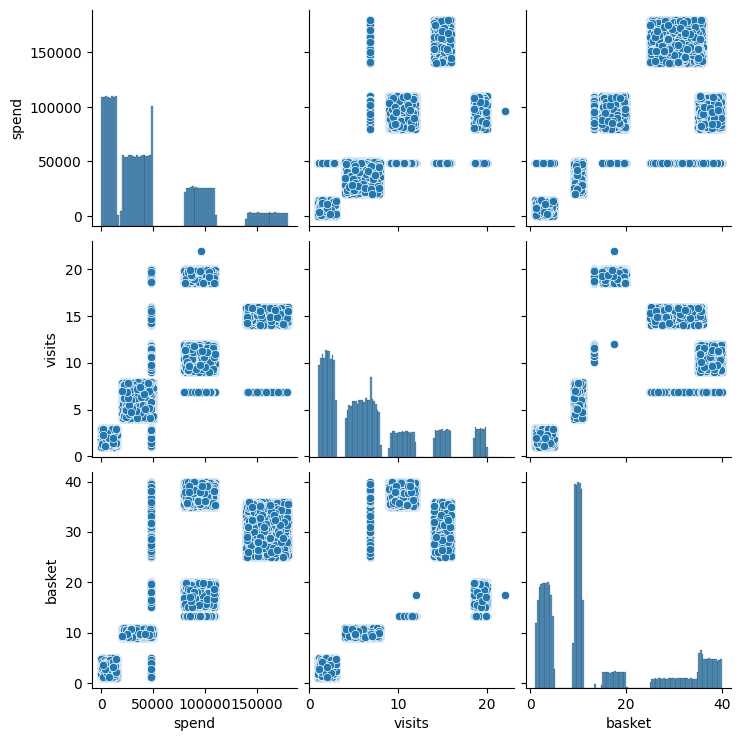

In [ ]:
sns.pairplot(df_cleaned.loc[:,quants])

Not much linear relationships visible

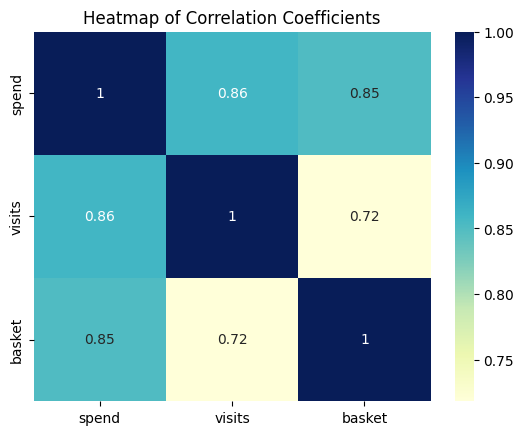

In [ ]:
sns.heatmap(df_cleaned.loc[:,['spend', 'visits', 'basket']].corr(),annot=True,cmap="YlGnBu")
plt.title("Heatmap of Correlation Coefficients")
plt.show()

# Principal Component Analysis

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[['spend', 'visits', 'basket']])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca_data = pca.fit_transform(df_scaled)
explained_variance = pca.explained_variance_ratio_

   PC  Explained_Variance
0   1            0.873514
1   2            0.093969
2   3            0.032517


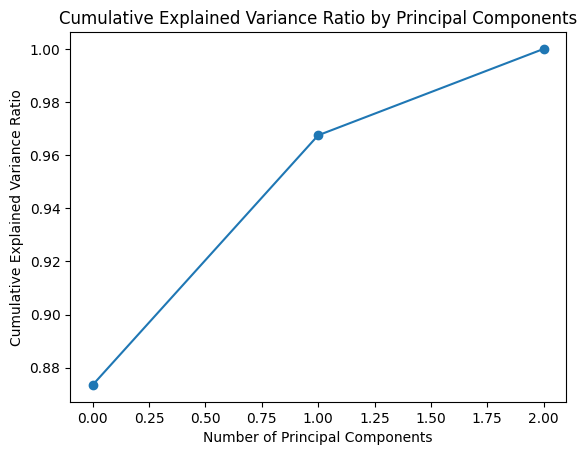

In [ ]:
explained_variance_df=pd.DataFrame({
                                    "PC":[1,2,3],
                                    "Explained_Variance":explained_variance
                                    }
                                   )


#Dataframe of explained_variance
print(explained_variance_df)

# Plot explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_df.Explained_Variance)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

2  Principal Component are enough to explain nearly 90% of the variance

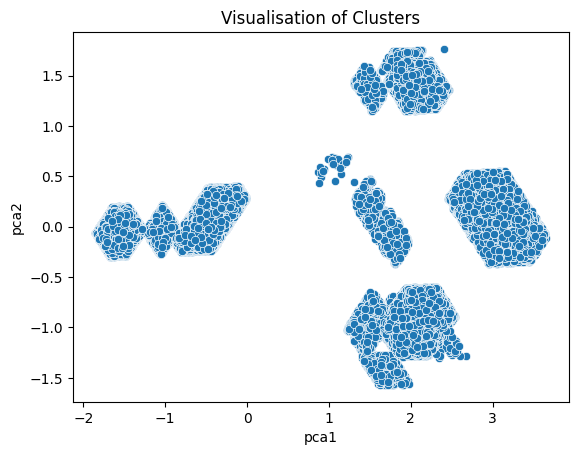

In [ ]:
#Creating a dataframe using principal components
pca_data = pd.DataFrame(pca_data, columns=['pca1','pca2','pca3'])

#Graphing the 1st 2 Principal Components
sns.scatterplot(data=pca_data,
                x=pca_data.pca1,
                y=pca_data.pca2)
plt.title("Visualisation of Clusters")
plt.show()

## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

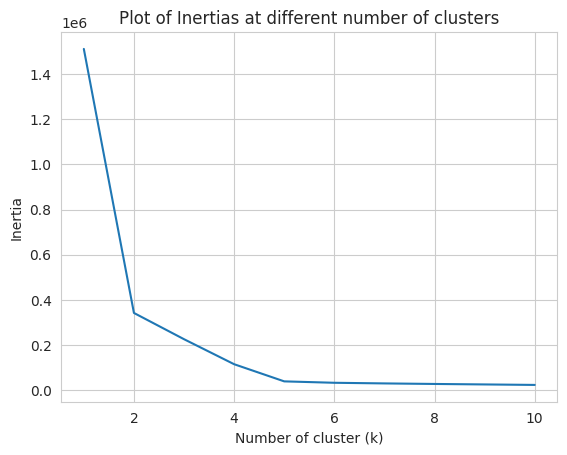

In [ ]:
from sklearn.cluster import KMeans

#ApplyingK= Means to the Principal Components
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=100)
    km.fit(pca_data)
    sse.append(km.inertia_)

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Inertia",
      title ='Plot of Inertias at different number of clusters')

plt.show()

Usng  the Elbow Method we can confirm that the optimal number of clusters is 5

In [ ]:
km = KMeans(n_clusters=5, random_state=100)
km.fit(pca_data)

Labels=km.labels_
df_cleaned['Labels']=Labels
print(df_cleaned.Labels.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels
1    185355
3    171035
0     65503
2     45504
4     36601
Name: count, dtype: int64


In [ ]:
df_cleaned.groupby('Labels').mean()

,id,spend,visits,basket
Labels,,,,
0,280119.572371,93780.905459,10.487907,37.431746
1,279704.984133,35270.258661,6.015065,9.983131
2,279150.083839,159954.266240,14.964779,30.483289
3,280479.510738,8199.892117,1.994266,2.987330
4,281833.286577,94023.027325,19.225913,17.465687


<Axes: xlabel='pca1', ylabel='pca2'>

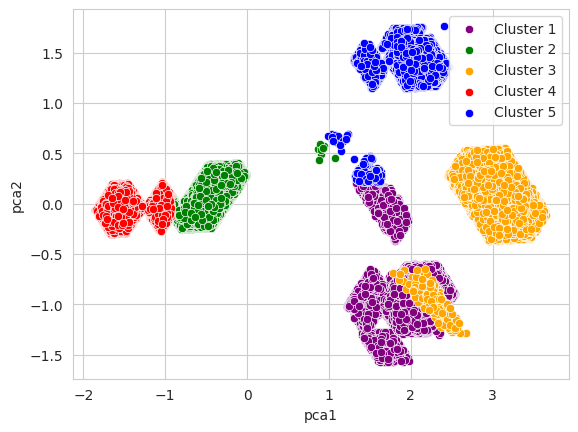

In [ ]:
df_0 = pca_data[Labels==0]
df_1 = pca_data[Labels==1]
df_2 = pca_data[Labels==2]
df_3 = pca_data[Labels==3]
df_4 = pca_data[Labels==4]

sns.scatterplot(x='pca1', y='pca2', data=df_0, color='purple', label='Cluster 1')
sns.scatterplot(x='pca1', y='pca2', data=df_1, color='green', label='Cluster 2')
sns.scatterplot(x='pca1', y='pca2', data=df_2, color='orange', label='Cluster 3')
sns.scatterplot(x='pca1', y='pca2', data=df_3, color='red', label='Cluster 4')
sns.scatterplot(x='pca1', y='pca2', data=df_4, color='blue', label='Cluster 5')

# Analysing Clusters

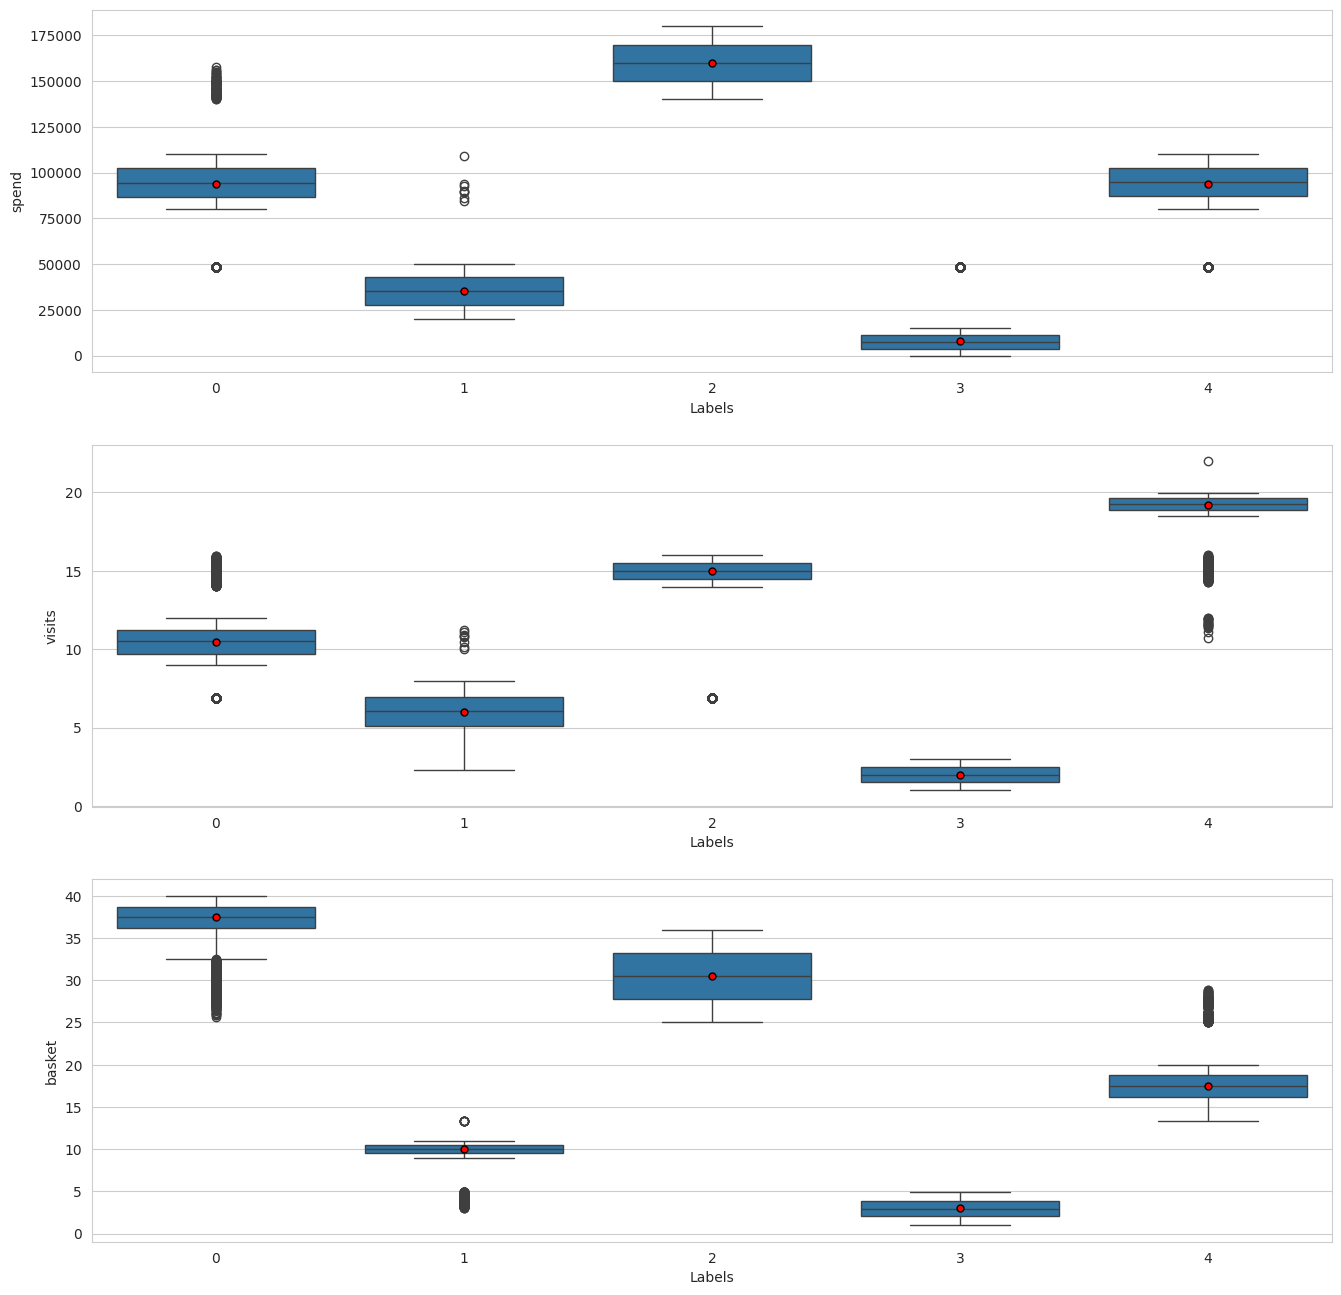

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.boxplot(x=df_cleaned.Labels,
                y=df_cleaned[quants[i]],
                showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": 'red',"markeredgecolor": "black","markersize": "5"},
                ax=ax)
    #ax.set_title(f"Boxplot of {(quants[i])}")


plt.show()